INVESTIGATING THE CENSUS INCOME DATASET

QUESTION POSED
1. Are males more than females in the census?
3. Between male and females who has the highest average hours per week?
2. What is the education certificate attained by most people?
2. Do higher education number implies hours per week?

## INTRODUCTION

LOADING THE DATA

In [1]:
# Importing the relevant libraries
import numpy as np # library for maths computations
import pandas as pd # library for data manipulation
import matplotlib.pyplot as plt # library for visualization
import seaborn as sns # library for visualization
sns.set() # this command sets the seaborn chart style as the default

## DATA WRANGLING

LOADING THE DATA

In [2]:
# Reading the dataset
data = pd.read_csv('census_income_data.csv') 

ACCESSING THE DATA

In [3]:
# assessing on the first 10
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
# Brief information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# Basic statistics summary about the data
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# the dimension of the data
data.shape

(32561, 15)

In [7]:
# checking for unique values values
data.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       41
income                2
dtype: int64

In [8]:
# checking for number missing values
np.sum(data.isna())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

CLEANING DATA
Missing data (in columns 'workclass', 'occupation' and 'native-country')
- The columns have some missing values so we cleaned the data by replacing the missing values  

In [9]:
# replacing missing values in 'workclass' column with values that appear before them
data['workclass'].fillna('bfill', inplace=True)
# replacing missing values in 'occupation' column with values that appear after them
data['occupation'].fillna('ffill', inplace=True)
# replacing missing values in 'native-country' column with values that appear after them
data['native-country'].fillna('ffill', inplace=True)


In [10]:
# checking for number missing values again
np.sum(data.isna())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

## EXPLORATORY DATA ANALYSIS

Defining a function for other plots

In [11]:
def plot_styles(title, ylab, xlab):
    plt.xticks(fontsize = 13) 
    plt.yticks(fontsize = 13) 
    plt.title(title, fontsize = 20, fontweight = "bold")
    plt.ylabel(ylab, fontsize = 17 )
    plt.xlabel(xlab, fontsize = 17 )
    plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


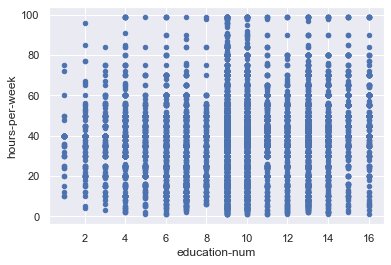

In [11]:
# exploring the relationship between education-num and hours-per-week
data.plot(x="education-num", y="hours-per-week", kind="scatter");

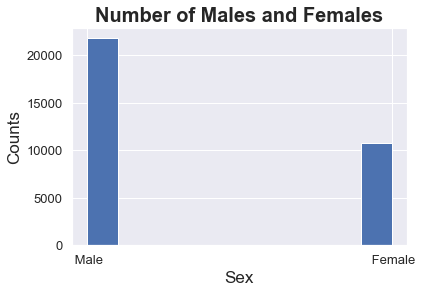

In [12]:
# visualizing the number of Males and that of the females
plt.hist(data.sex)
# calling the function (plot_type)
plot_styles("Number of Males and Females", "Counts", "Sex")

Computing their statistics

In [13]:
# SLITTING DATA INTO MALES AMD FEMALES
data_M = data[data.sex == ' Male']
data_F = data[data.sex == ' Female'] 

In [14]:
# diplaying the first 5 of males
data_M.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K


Total number  males

In [15]:
# calculating the total number  males
data_M['sex'].count()

21790

Total number  Females

In [16]:
# diplaying the last 5 of males
data_F.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32546,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
32549,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [17]:
# calculating the average hours-per-week of only males
np.mean(data_M['hours-per-week'])

42.42808627810923

In [18]:
# checking the summary statistics
data_F['hours-per-week'].describe()

count    10771.000000
mean        36.410361
std         11.811300
min          1.000000
25%         30.000000
50%         40.000000
75%         40.000000
max         99.000000
Name: hours-per-week, dtype: float64

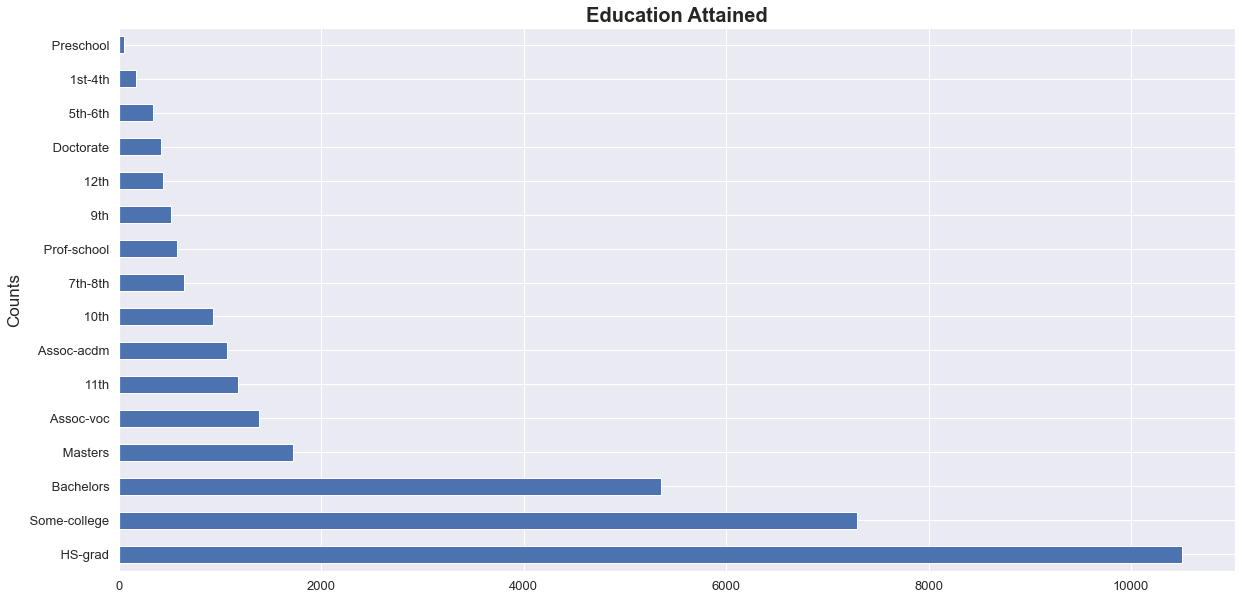

In [20]:
plt.figure(figsize = (20, 10))
data['education'].value_counts().plot(kind='barh')
# calling the function (plot_type)
plot_styles("Education Attained", "Counts", "")

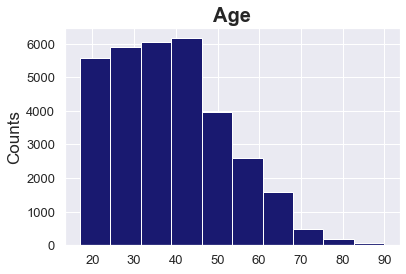

In [21]:
plt.hist(data['age'], color='midnightblue');
plot_styles("Age", "Counts", "")

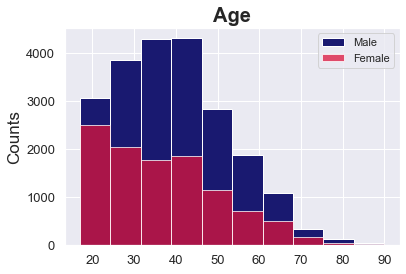

In [22]:
plt.hist(data_M['age'], facecolor='midnightblue', label='Male', alpha=1)
plt.hist(data_F['age'], facecolor='crimson', label='Female', alpha=0.75)
plt.legend();
plot_styles("Age", "Counts", "")

## CONCLUSIONS

- The Data analysis showed that men were 28999 and females 10444 which is claerly seen in the chart that men are more than females.
- The analysis also indicates men has the highest average hours oer week.
- The Education qualification attained most is HS-grad. 
- There is no relationship between educarion and hours per week thus higher education number does indicate a smaller hours per week.